## Energy Market in Tanzania: Market Entry Considerations

In [10]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('agg')

In [56]:
# Get the current working directory
current_directory = os.getcwd()
# Save the figure in the 'outputs' sub-folder
output_path = current_directory.replace('data_and_analysis','reports_and_outputs') + '/hmp_tester.png'
output_path
plt.savefig(output_path, dpi=300, format='png')

'/Users/kevinwaithaka/Library/CloudStorage/OneDrive-Personal/work/interviewing/2023/solar_tz/reports_and_outputs/hmp_tester.png'

In [47]:
os.getcwd()

'/Users/kevinwaithaka/Library/CloudStorage/OneDrive-Personal/work/interviewing/2023/solar_tz/data_and_analysis'

In [192]:
# Define a fn to plot a heatmap
# def heatmap_plotter(df = i_hh_energy,
#                     col_name_1='cooking_fuel',
#                     col_name_2='lighting_fuel',
#                     plot_title='Relationship of cooking and lighting fuel use',
#                     xlab='Lighting Fuel',
#                     ylab='Cooking Fuel',
#                     fig_name='hmp_cooking_and_lighting_fuel_use',
#                     figure_height=8):  # Adjust the figure height as needed

def heatmap_plotter(df,
                    col_name_1,
                    col_name_2,
                    plot_title,
                    xlab,
                    ylab,
                    fig_name):

    # Create a crosstab
    crosstab = pd.crosstab(df[col_name_1], df[col_name_2])

    # Calculate the total count of all observations
    total_count = crosstab.values.sum()

    # Calculate the percentages by dividing each cell by the total count
    percentage_crosstab = (crosstab / total_count) * 100

    # Create a figure with the specified height
    plt.figure(figsize=(8, 6))  # Adjust figure width and height as needed
    ax = plt.gca()

    # Customize chart title and labels
    plt.title(plot_title, fontsize=15, fontweight='bold', color='navy')

    # Create a heatmap to visualize relationships with custom styling
    sns.heatmap(percentage_crosstab, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax, annot_kws={"size": 12})

    # Customize tick parameters
    ax.tick_params(axis='x', which='both', labelrotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Customize grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.6, color='gray')

    # Set x-axis and y-axis labels
    ax.set_xlabel(xlab, fontsize=14, fontweight='bold', color='dimgray')
    ax.set_ylabel(ylab, fontsize=14, fontweight='bold', color='dimgray')

    # Set x-axis and y-axis tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold', color='dimgray')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold', color='dimgray')

    # Manually adjust the figure size and margins
    plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

    # Show the chart
    plt.show()

    # Save in outputs folder:
    # output_path = os.path.join(output_directory, f'{fig_name}.png')
    # plt.savefig(output_path, dpi=300, format='png')

    # Get the current working directory
    current_directory = os.getcwd()
    # Save the figure in the 'outputs' sub-folder
    output_path = current_directory.replace('data_and_analysis','reports_and_outputs') + fig_name +'.png'
    plt.savefig(output_path, dpi=300, format='png')

In [60]:
# Define a bar_plotter function
# def bar_plotter(df = i_hh_energy,
#                 column_name = 'cooking_fuel',
#                 plot_title = 'Types of Cooking fuel used across households',
#                 xlab = 'Cooking Fuel',
#                 ylab = '%age of Households',
#                 fig_name = 'Distribution of Cooking Fuels'):

def bar_plotter(df,
                column_name,
                plot_title,
                xlab,
                ylab,
                fig_name):

    """This funtion plots barplots given 1 dataframe column
        Defaults are set for the Plot of review of cooking fuels"""
    # Set a custom color palette
    custom_palette = sns.color_palette("Set2")

    # Create a figure and axes with custom background color
    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    ax.set_facecolor('#f0f0f0')  # Light grey background color

    # Plot the distribution of cooking fuel with custom styling
    item_counts = df[column_name].value_counts(normalize = True) * 100

    sns.barplot(x = item_counts.index,
                y = item_counts.values,
                palette = custom_palette)


    # Customize chart title and labels
    plt.title(plot_title, fontsize=15, color='navy')
    plt.xticks(rotation=45, fontsize=11, color='dimgray')
    plt.yticks(fontsize=11, color='dimgray')
    plt.xlabel(xlab, fontsize=12, color='black')
    plt.ylabel(ylab, fontsize=12, color='black')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Customize grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.6, color='gray')

    # Customize tick parameters
    ax.tick_params(axis='x', which='both', bottom=False)

    # Annotate the bars with values (optional)
    for i, v in enumerate(item_counts.values):
        plt.text(i, v, f'{v:.2f}%', fontsize=12, ha='center', va='bottom', color='black')

    plt.show()

    # Adjust the figure size and margins
    plt.gcf().subplots_adjust(left=0.1, right=0.9, bottom=0.3, top=0.9)
    # output_string = fig_name + '.png'
    # plt.savefig(output_string, dpi = 300, format = 'png')
    current_directory = os.getcwd()
    # Save the figure in the 'outputs' sub-folder
    output_path = current_directory.replace('data_and_analysis','reports_and_outputs') + fig_name +'.png'
    plt.savefig(output_path, dpi=300, format='png')

In [84]:
def chloro_plotter(map_df,
                   main_title,
                   subtitle,
                   fig_name):
    ## Visualisation
    # Merge the percentage data with a GeoDataFrame containing region geometries
    merged_gdf = gdf.merge(map_df, left_on='Region_Nam', right_index=True)

    # Create the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    merged_gdf.plot(column='electricity_source', cmap='YlGn', linewidth=0.8, ax=ax, legend=True)

    #main_title = 'Households with no Electricity Access'
    #subtitle = 'Households with no access to the Tanesco grid, solar panels, community generators or motor batteries'
    ax.set_title(main_title, fontsize=16)
    plt.text(0.5, -0.1, subtitle, transform=ax.transAxes, ha='center', fontsize=12, color='gray')
    plt.axis('off')  # Turn off axis

    # Annotate each region with the name and value
    for idx, row in merged_gdf.iterrows():
        region_name = row['Region_Nam']
        percentage = row['electricity_source']
        centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y

        # Determine the background color and set text color accordingly
        background_color = 'white' if percentage > 45 else 'black'

        # Annotate the region name with the determined text color
        plt.annotate(region_name, xy=(centroid_x, centroid_y), xytext=(0, -20),
                     textcoords='offset points', fontsize=12, color=background_color, ha='center', weight = 'bold')

        # Annotate the percentage below the region name
        plt.annotate(f"{percentage:.2f}%", xy=(centroid_x, centroid_y), xytext=(0, 5),
                     textcoords='offset points', fontsize=12, color = background_color, ha='center', weight = 'bold')

    plt.show()
    plt.savefig( fig_name+'.png', dpi = 300, bbox_inches = 'tight')

In [13]:
# Set some constants
# https://data.worldbank.org/country/TZ
total_population = 65497748
# 2021 Exchange rate (USD): 0.0004
# https://www.exchangerates.org.uk/TZS-USD-spot-exchange-rates-history-2021.html
fx = 0.0004

In [14]:
# The first step is to fetch all the data
# determine the relative path of the folder holding the csv files
folder_path = "./TZA_2020_NPS-R5_v02_M_CSV"

In [15]:
# Initialize an empty dictionary to store the data (household and consumption data specifically)
data_dict = {}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("hh_") or filename.startswith("consumption_"):
        # Create the variable name (removing the .csv extension)
        var_name = os.path.splitext(filename)[0]
        
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        data_dict[var_name] = pd.read_csv(file_path)

In [16]:
# List of all datasets:
data_dict.keys()

dict_keys(['hh_sec_q1', 'hh_sec_q2', 'hh_sec_e3', 'hh_sec_e2', 'hh_sec_e1', 'hh_sec_i2', 'hh_sec_a', 'hh_sec_v', 'hh_sec_c', 'hh_sec_b', 'hh_sec_ja1', 'hh_sec_f', 'hh_sec_p', 'hh_sec_g', 'hh_sec_o2', 'hh_sec_r', 'hh_sec_s', 'hh_sec_d', 'hh_sec_o1', 'hh_sec_u2', 'hh_sec_i', 'hh_sec_h', 'hh_sec_k', 'consumption_real_y5', 'consumption_real_y4', 'hh_sec_n', 'hh_sec_l', 'hh_sec_m', 'hh_sec_j3', 'hh_sec_j1', 'hh_sec_j4'])

In [17]:
# Load the GeoJSON file
# Important for analysing geo data
# Downloaded from: https://energydata.info/dataset/tanzania-region-district-boundary-2012
gdf = gpd.read_file('regions.geojson')
gdf.head()

,Region_Cod,Region_Nam,geometry
0,06,Pwani,"MULTIPOLYGON (((39.32625 -8.29375, 39.32662 -8..."
1,24,Simiyu,"MULTIPOLYGON (((33.91144 -2.18240, 33.91730 -2..."
2,25,Geita,"MULTIPOLYGON (((31.81754 -2.70194, 31.81611 -2..."
3,13,Singida,"MULTIPOLYGON (((34.92803 -4.26680, 34.92803 -4..."
4,11,Iringa,"MULTIPOLYGON (((34.93545 -6.89101, 34.93821 -6..."


From the review of the data, it seems like the important datasets are:
1. hh_sec_a {y5_hhid}
2. hh_sec_b {y5_hhid, indidy5}
3. hh_sec_e2 (occupation data) {y5_hhid, indidy5}
3. hh_sec_e3 (firewood collection shows source of energy) {y5_hhid, indidy5}
4. hh_seg_g (financial status) {y5_hhid, indidy5}
5. hh_sec_j1 (food consumed) {y5_hhid, itemcode
6. hh_sec_m (household assets) {y5_hhid, itemcode}

### Columns of interest

In [18]:
# a_hh_basic = data_dict['hh_sec_a'][['y5_hhid','y5_rural','hh_a02_1',]].rename(columns = {'hh_a02_1':'location'})
#
# # getting region and district info from the location column "hh_a02_1"
# a_hh_basic['location'] = a_hh_basic['location'].astype(str)
#
# # extract all but the last xter
# a_hh_basic['region'] = a_hh_basic['location'].str[:-1]
# # extract the last xter
# a_hh_basic['district'] = a_hh_basic['location'].str[-1]
#
# # convert region/district back into integers
# a_hh_basic['region'] = a_hh_basic['region'].astype(int)
# a_hh_basic['district'] = a_hh_basic['district'].astype(int)
# a_hh_basic = a_hh_basic.drop(columns = ['location'])
#
# # [OBS] region data does not align perfectly with "MAGERESHO YA MIKOA NA WILAYA" section
# # of the questionairre
# a_hh_basic.groupby(['region', 'district']).size().reset_index(name='count')

In [19]:
# Consumption data:
# Construction from nps_wave_5_report.pdf, appendix A.
# consumption is for 28 days
# data dictionaty: https://microdata.worldbank.org/index.php/catalog/5639/data-dictionary/F65?file_name=consumption_real_y5
# data_dict['consumption_real_y5']#.columns

#### Consumption data

In [20]:
consumption_data = data_dict['consumption_real_y5']
consumption_data = consumption_data[['y5_hhid','urban','region','district','hhsize','nf_clothing', 'nf_utilities', 'nf_hhexpenses', 'nf_transport', 'nf_communic', 'nf_recreat', 'nf_other', 'dur_exp', 'rent_exp', 'foodIN', 'foodOUT', 'educa', 'health']]

In [21]:
# Convert currency
consumption_data.iloc[:, 5:] = consumption_data.iloc[:, 5:] * fx

#### Energy data

In [29]:
i_hh_energy = data_dict['hh_sec_i'][['y5_hhid','hh_i16','hh_i16_1','hh_i17','hh_i18']].rename(columns = {
    'hh_i16':'cooking_fuel',
    'hh_i16_1':'cooking_stove',
    'hh_i17':'lighting_fuel',
    'hh_i18':'electricity_source'
})

In [30]:
# Create dictionaries to help in renaming the values in the columns
# Fuel used for cooking
ckfuel_dict = { 1:'Firewood',
                2:'Paraffin',
                3:'Electricity',
                4:'Gas',
                5:'Charcoal',
                6:'Animal Residue',
                7:'Gas (Biogas)'}

# Assumptions made in assigning the codes to the stove types, since the questionnaire only has 2 codes while the data has 4 outcomes
stove_dict = {  1:'stone',
                2:'other self-built',
                3:'manufactured',
                4:'other'}

light_dict = {  1:'Electricity',
                2:'Solar',
                3:'Gas',
                4:'Gas (Biogas)',
                5:'Lamp oil',
                6:'Candle',
                7:'Firewood',
                8:'Private Generator',
                9:'Torch',
                10:'Other'}

elec_dict = {   1:'Tanesco',
                2:'Community Generator',
                3:'Solar Panels',
                4:'Own Generator',
                5:'Car Battery',
                6:'Motorcycle Battery',
                7:'Other'}

In [31]:
#df['string_column'] = df['code_column'].map(code_to_string)
i_hh_energy['cooking_fuel'] = i_hh_energy['cooking_fuel'].map(ckfuel_dict).fillna('Other')
i_hh_energy['cooking_stove'] = i_hh_energy['cooking_stove'].map(stove_dict).fillna('Other')
i_hh_energy['lighting_fuel'] = i_hh_energy['lighting_fuel'].map(light_dict).fillna('Other')
i_hh_energy['electricity_source'] = i_hh_energy['electricity_source'].map(elec_dict).fillna('no-electricity')
i_hh_energy

,y5_hhid,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
0,1000-001-01,Firewood,stone,Solar,Solar Panels
1,1000-001-02,Charcoal,manufactured,Candle,no-electricity
2,1000-001-03,Firewood,stone,Solar,Solar Panels
3,1000-001-06,Firewood,stone,Electricity,Tanesco
4,1001-001-01,Firewood,stone,Solar,Community Generator
...,...,...,...,...,...
4704,9807-001-99,Electricity,Other,Electricity,Tanesco
4705,9808-001-99,Electricity,Other,Electricity,Tanesco
4706,9809-001-99,Firewood,stone,Lamp oil,no-electricity
4707,9810-001-99,Charcoal,manufactured,Solar,Solar Panels


In [32]:
# Households using certain fuel types
cooking_fuel_counts = i_hh_energy['cooking_fuel'].value_counts(normalize = True) * 100
lighting_fuel_counts = i_hh_energy['lighting_fuel'].value_counts(normalize = True) * 100
electricity_source_counts = i_hh_energy['electricity_source'].value_counts(normalize = True) * 100

In [33]:
i_hh_energy

,y5_hhid,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
0,1000-001-01,Firewood,stone,Solar,Solar Panels
1,1000-001-02,Charcoal,manufactured,Candle,no-electricity
2,1000-001-03,Firewood,stone,Solar,Solar Panels
3,1000-001-06,Firewood,stone,Electricity,Tanesco
4,1001-001-01,Firewood,stone,Solar,Community Generator
...,...,...,...,...,...
4704,9807-001-99,Electricity,Other,Electricity,Tanesco
4705,9808-001-99,Electricity,Other,Electricity,Tanesco
4706,9809-001-99,Firewood,stone,Lamp oil,no-electricity
4707,9810-001-99,Charcoal,manufactured,Solar,Solar Panels


#### Energy visualisations

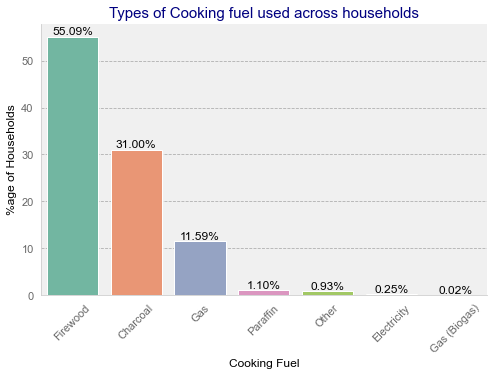

<Figure size 432x288 with 0 Axes>

In [34]:
bar_plotter(df = i_hh_energy,
            column_name = 'cooking_fuel',
            plot_title = 'Types of Cooking fuel used across households',
            xlab = 'Cooking Fuel',
            ylab = '%age of Households',
            fig_name = 'bplt_cooking_fuels')

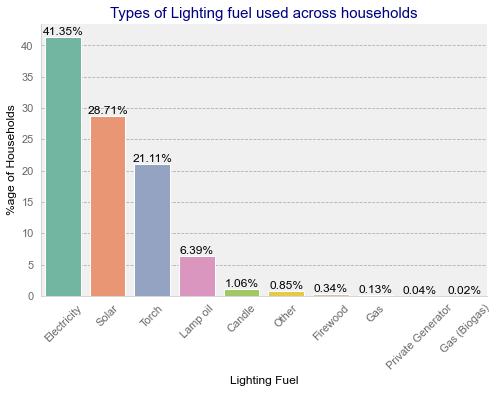

<Figure size 432x288 with 0 Axes>

In [35]:
bar_plotter(df = i_hh_energy,
            column_name = 'lighting_fuel',
            plot_title = 'Types of Lighting fuel used across households',
            xlab = 'Lighting Fuel',
            ylab = '%age of Households',
            'bplt_lighting_fuels')

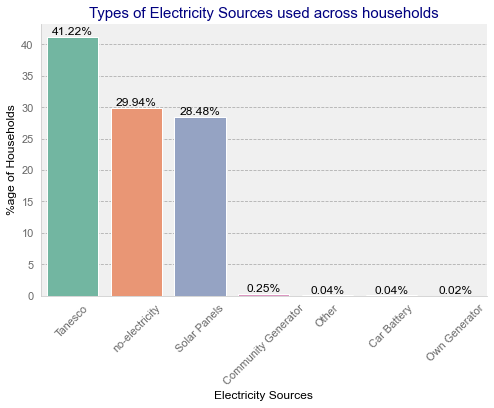

<Figure size 432x288 with 0 Axes>

In [37]:
bar_plotter(df = i_hh_energy,
            column_name = 'electricity_source',
            plot_title = 'Types of Electricity Sources used across households',
            xlab = 'Electricity Sources',
            ylab = '%age of Households',
            fig_name = 'bplt_electricity_sources')

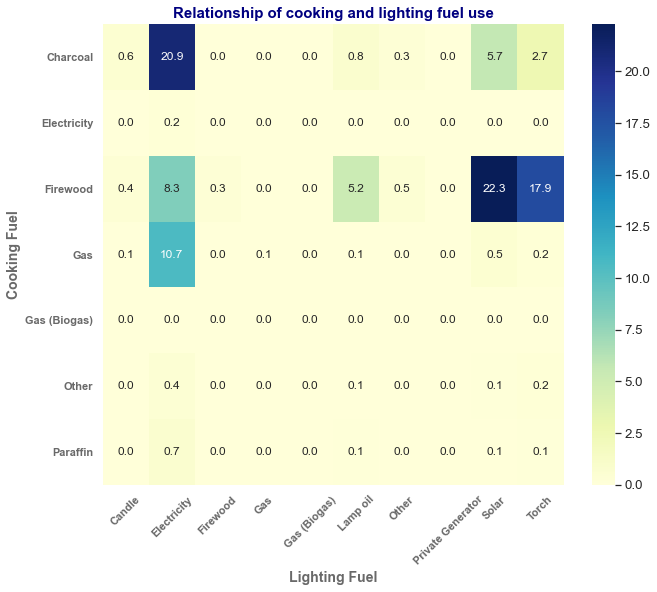

<Figure size 432x288 with 0 Axes>

In [61]:
heatmap_plotter(df = i_hh_energy,
                col_name_1='cooking_fuel',
                col_name_2='lighting_fuel',
                plot_title='Relationship of cooking and lighting fuel use',
                xlab='Lighting Fuel',
                ylab='Cooking Fuel',
                fig_name='hmp_cooking_and_lighting_fuel_use')

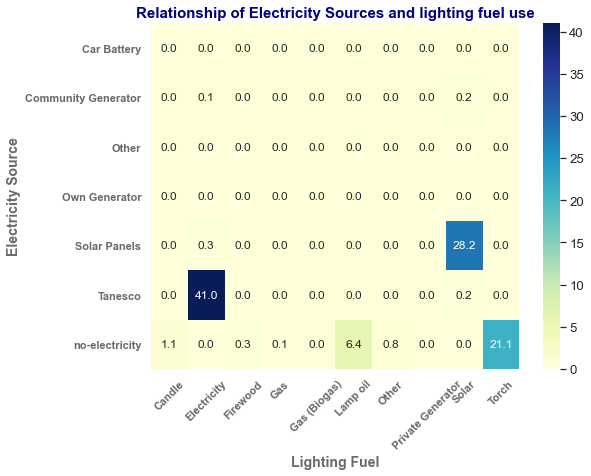

<Figure size 432x288 with 0 Axes>

In [193]:
heatmap_plotter(df = i_hh_energy,
                col_name_1='electricity_source',
                col_name_2='lighting_fuel',
                plot_title='Relationship of Electricity Sources and lighting fuel use',
                xlab='Lighting Fuel',
                ylab='Electricity Source',
                fig_name='hmp_electricity_and_lighting_fuel_use')

#### Consumption + Energy

In [113]:
##
consumption_data_w_energy = consumption_data.merge(i_hh_energy, how = 'left', on = 'y5_hhid')
#consumption_data_w_energy

,y5_hhid,urban,region,district,hhsize,nf_clothing,nf_utilities,nf_hhexpenses,nf_transport,nf_communic,...,dur_exp,rent_exp,foodIN,foodOUT,educa,health,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
0,1230-001-01,2,7,71,4,0.0,3938.08,0.0,24.96,72.0,...,146.107892,447.376650,0.000,3288.48,0.00,312.0,Charcoal,manufactured,Electricity,Tanesco
1,1210-001-01,2,7,71,6,250.8,268.16,0.0,0.00,72.0,...,168.019366,551.867700,3006.640,93.60,352.20,0.0,Gas,Other,Electricity,Tanesco
2,1249-001-01,2,7,71,4,112.0,321.60,7.2,748.80,144.0,...,59.544093,336.000000,157.664,1612.00,228.00,0.0,Gas,Other,Electricity,Tanesco
3,1253-001-01,2,7,72,4,152.0,165.28,4.8,124.80,24.0,...,8.775672,144.000000,896.480,135.20,72.00,62.4,Charcoal,manufactured,Electricity,Tanesco
4,1291-001-01,2,7,71,5,140.0,447.52,48.8,166.40,120.0,...,275.879242,774.725200,1242.800,1416.48,809.60,39.0,Gas,Other,Electricity,Tanesco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,3300-001-01,2,53,531,7,238.0,733.76,168.0,480.00,72.0,...,460.552719,252.226750,1523.600,0.00,1640.00,0.0,Gas,Other,Electricity,Tanesco
4705,3572-001-03,2,53,531,3,35.6,199.84,0.0,66.56,28.8,...,43.829876,295.138675,871.520,0.00,0.00,208.0,Charcoal,manufactured,Electricity,Tanesco
4706,2387-001-01,2,51,511,4,44.0,74.08,0.0,0.00,19.2,...,22.960221,169.282438,1297.920,72.80,162.00,0.0,Charcoal,other self-built,Solar,Solar Panels
4707,3321-001-06,2,53,531,2,42.0,321.60,20.0,49.92,38.4,...,50.521212,384.000000,193.440,1493.44,0.00,0.0,Gas,Other,Electricity,Tanesco


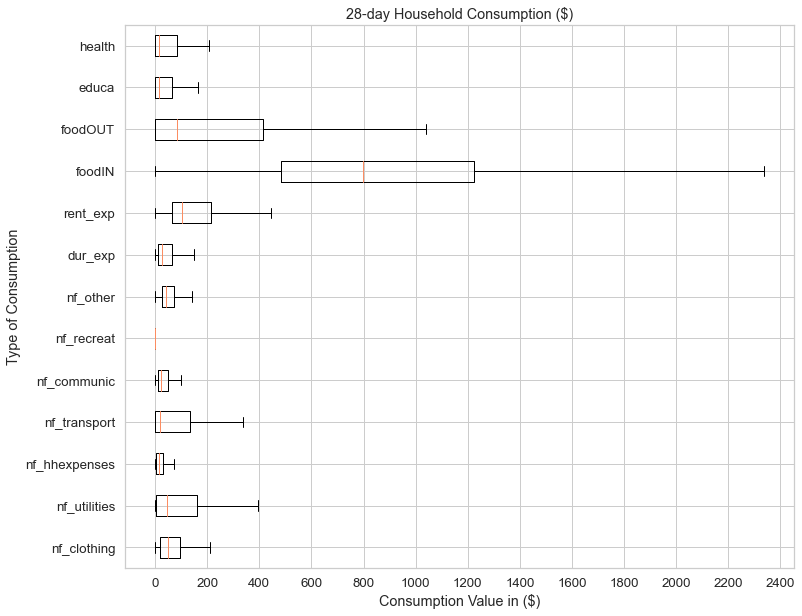

<Figure size 432x288 with 0 Axes>

In [64]:
# Let's visualise the consumption of the households
plt.figure(figsize=(12, 10))
plt.boxplot(consumption_data.iloc[:, 5:].values,
            labels = consumption_data.iloc[:, 5:].columns,
            vert=False,
            showfliers = False)
plt.xticks(range(0, 2500, 200))
plt.title('28-day Household Consumption ($)')
plt.xlabel('Consumption Value in ($)')
plt.ylabel('Type of Consumption')
plt.show()

plt.savefig('hh_consumption.png', dpi = 300, format = 'png')

#### Regional Data

In [80]:
gdf['Region_Cod'] = gdf['Region_Cod'].astype(int)
consumption_data_w_energy = consumption_data_w_energy.merge(gdf, how = 'left', left_on = 'region', right_on = 'Region_Cod')
# consumption_data_w_energy.head()

,y5_hhid,urban,region,district,hhsize,nf_clothing,nf_utilities,nf_hhexpenses,nf_transport,nf_communic,...,foodOUT,educa,health,cooking_fuel,cooking_stove,lighting_fuel,electricity_source,Region_Cod,Region_Nam,geometry
0,1230-001-01,2,7,71,4,0.0,3938.08,0.0,24.96,72.0,...,3288.48,0.0,312.0,Charcoal,manufactured,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
1,1210-001-01,2,7,71,6,250.8,268.16,0.0,0.00,72.0,...,93.60,352.2,0.0,Gas,Other,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
2,1249-001-01,2,7,71,4,112.0,321.60,7.2,748.80,144.0,...,1612.00,228.0,0.0,Gas,Other,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
3,1253-001-01,2,7,72,4,152.0,165.28,4.8,124.80,24.0,...,135.20,72.0,62.4,Charcoal,manufactured,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
4,1291-001-01,2,7,71,5,140.0,447.52,48.8,166.40,120.0,...,1416.48,809.6,39.0,Gas,Other,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."


In [81]:
# Create a deo
geo_df = gpd.GeoDataFrame(consumption_data_w_energy, geometry='geometry')

In [82]:
# Group by Region_Name and calculate the percentage of households with "no-electricity"
no_elec_pct = consumption_data_w_energy.groupby('Region_Nam')['electricity_source'].apply(lambda x: (x == 'no-electricity').mean() * 100)

# Group by Region_Name and calculate the percentage of households with grid
no_grid_pct = consumption_data_w_energy.groupby('Region_Nam')['electricity_source'].apply(lambda x: (x != 'Tanesco').mean() * 100)

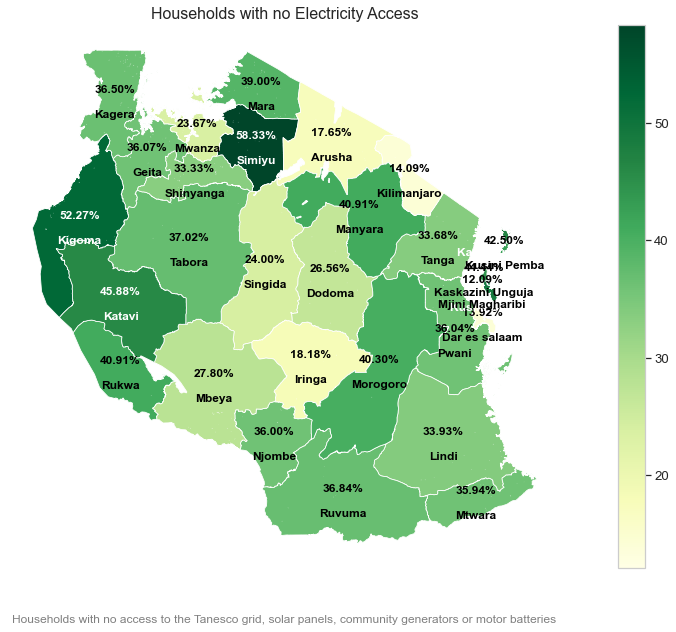

<Figure size 432x288 with 0 Axes>

In [85]:
chloro_plotter(map_df = no_elec_pct,
               main_title = 'Households with no Electricity Access',
               subtitle = 'Households with no access to the Tanesco grid, solar panels, community generators or motor batteries',
               fig_name = 'tz_no_electricity_access.png')

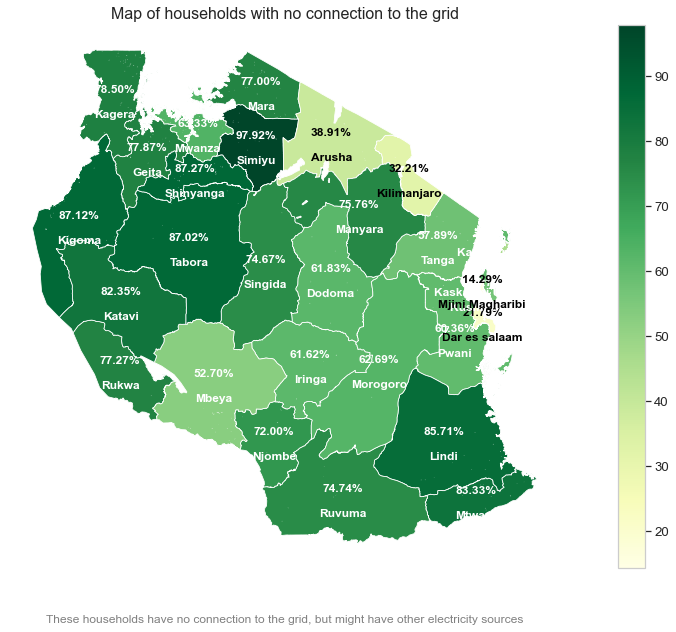

<Figure size 432x288 with 0 Axes>

In [83]:
chloro_plotter(map_df = no_grid_pct,
               main_title = 'Map of households with no connection to the grid',
               subtitle = 'These households have no connection to the grid, but might have other electricity sources',
               fig_name = 'tz_no_grid_access.png')

#### Earnings DATA

In [92]:
time_unit_wages = { 1:'Hour',
                    2:'Day',
                    3:'Week',
                    4:'Fortnight',
                    5:'Month',
                    6:'Quarter',
                    7:'Half Year',
                    8:'Year'}

In [93]:
# individual-level data on earnings/labour
hh_income = data_dict['hh_sec_e1'][['y5_hhid','indidy5','hh_e35a','hh_e35b','hh_e36','hh_e37a','hh_e37b','hh_e38','hh_e39','hh_e41','hh_e51a','hh_e51b','hh_e52','hh_e53a','hh_e53b','hh_e54' ]]

In [94]:
hh_income = hh_income.rename(columns = {    'hh_e35a':'pri_pay_amt',
                                            'hh_e35b':'pri_pay_period',
                                            'hh_e36':'pri_pay_nc',
                                            'hh_e37a':'pri_pay_nc_amt',
                                            'hh_e37b':'pri_pay_nc_period',
                                            'hh_e38':'months_per_yr',
                                            'hh_e39':'wks_per_month',
                                            'hh_e40':'hrs_per_wk',
                                            'hh_e41':'hrs_l7d',
                                            'hh_e51a':'sec_pay_amt',
                                            'hh_e51b':'sec_pay_period',
                                            'hh_e52':'sec_pay_nc',
                                            'hh_e53a':'sec_pay_nc_amt',
                                            'hh_e53b':'sec_pay_nc_period',
                                            'hh_e54':'hrs_l7d'})

In [95]:
hh_income = hh_income.fillna(1)

In [96]:
hh_income['pri_pay_period'].value_counts()

pri_pay_period
1.0    21225
2.0      993
5.0      971
3.0      340
4.0       48
6.0        8
8.0        6
7.0        1
Name: count, dtype: int64

In [ ]:
# Dictionary mapping pri_pay_period to multiplier_pri_a
# Assumption: daily labourers work for 25 days
# multiplier_mapping = {
#     1: lambda row: row['wks_per_month'] * row['hrs_l7d'] * row['wks'],
#     2: 28,
#     3: lambda row: row['wks_per_month'],
#     4: 2,
#     5: 1,
#     6: 1 / 3,
#     7: 1 / 6,
#     8: 1 / 12
# }
#
# # Function to calculate multiplier_pri_a based on pri_pay_period
# def calculate_multiplier(row):
#     return multiplier_mapping.get(row['pri_pay_period'], 0)


#def calculate_multiplier(row, pay_period_column):
#    return multiplier_mapping.get(row[pay_period_column], 0)

In [ ]:
# hh_income['multi_col_a'] = hh_income['wks_per_month'] * hh_income['hrs_l7d']


# cash income
# hh_income['multiplier_pri_a'] = hh_income.apply(calculate_multiplier, axis=1)
# hh_income['multiplier_pri_a'] = hh_income.apply(calculate_multiplier, axis=1)
# hh_income ['monthly_cash_pri'] = hh_income['multiplier_pri_a'] * hh_income['pri_pay_amt']


#hh_income[['pri_pay_amt']] * hh_income[['multiplier_pri_a']]

#### Energy Expenditure

In [127]:
energy_specific_exp = data_dict['hh_sec_k']

In [128]:
expenditure_items = {   201:'Kerosene',
                        202:'Electricity, including electricity vouchers',
                        203:'Gas (for lighting/cooking)',
                        205:'Petrol or diesel',
                        206:'Cell phone voucher',
                        207:'charcoal',
                        216:'Light bulbs',
                        414:'Lanterns',
                        419:'Electric/gas stove',
                        420:'Other stove',
                        421:'Water-heater'}

In [129]:
energy_specific_exp['energy_item'] = energy_specific_exp['itemcode'].map(expenditure_items).fillna('not_energy')

In [130]:
energy_specific_exp = energy_specific_exp[energy_specific_exp['hh_k01'] == 1.0].fillna(0)

In [131]:
# For the 3 items 101, 102 and 103 which are weekly, multiply by 4 to make it a monthly measure (approx)
energy_specific_exp['hh_k02'] = energy_specific_exp.apply(lambda row: row['hh_k02'] * 4 if row['itemcode'] in [101, 102, 103] else row['hh_k02'], axis=1)

In [132]:
monthly_spend = fx * pd.pivot_table(energy_specific_exp, values='hh_k02', index='y5_hhid', columns='energy_item', aggfunc='sum', fill_value=0)
# Add a column for total household expenditure
monthly_spend['total_expenditure'] = monthly_spend.sum(axis=1)
# Print the pivot table

In [186]:
monthly_spend_pct = pd.DataFrame(data = monthly_spend.iloc[:,:-1].values / monthly_spend.iloc[:,-1:].values,
             index = monthly_spend.index,
             columns = monthly_spend.iloc[:,:-1].columns)

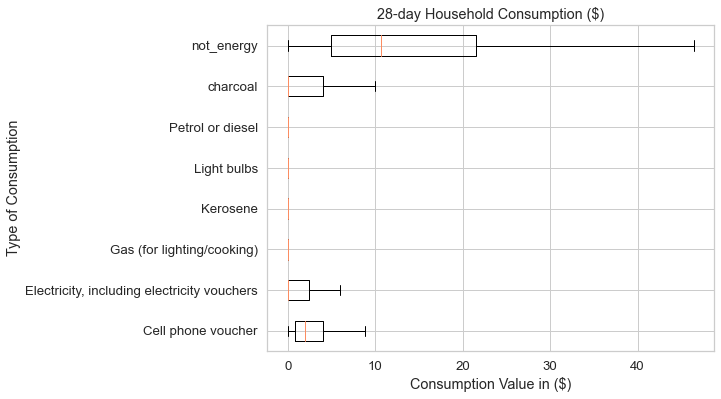

In [134]:
plt.figure(figsize=(8, 6))
plt.boxplot(monthly_spend.iloc[:,:-1].values,
            labels = monthly_spend.iloc[:,:-1].columns,
            vert=False,
            showfliers = False)
#plt.xticks(range(0, 2500, 200))
plt.title('28-day Household Consumption (General Population) ($)')
plt.xlabel('Consumption Value in ($)')
plt.ylabel('Type of Consumption')
plt.show()
#plt.savefig('hh_consumption.png', dpi = 300, format = 'png')

In [135]:
energy_specific_exp.merge()

,interview__key,y5_hhid,itemcode,hh_k01,hh_k02,energy_item
2,39-26-37-98,1000-001-01,103,1.0,4000.0,not_energy
6,39-26-37-98,1000-001-01,204,1.0,1600.0,not_energy
8,39-26-37-98,1000-001-01,206,1.0,1000.0,Cell phone voucher
10,39-26-37-98,1000-001-01,208,1.0,1200.0,not_energy
11,39-26-37-98,1000-001-01,209,1.0,4000.0,not_energy
...,...,...,...,...,...,...
122419,53-69-11-30,9811-001-99,209,1.0,8000.0,not_energy
122420,53-69-11-30,9811-001-99,210,1.0,4000.0,not_energy
122421,53-69-11-30,9811-001-99,211,1.0,3000.0,not_energy
122423,53-69-11-30,9811-001-99,213,1.0,6500.0,not_energy


In [145]:
non_elec_hh = consumption_data_w_energy[consumption_data_w_energy['electricity_source'] != 'Tanesco'][['y5_hhid','lighting_fuel','electricity_source']]

In [147]:
non_elec_hh.merge(energy_specific_exp,how = 'left')

,y5_hhid,lighting_fuel,electricity_source,interview__key,itemcode,hh_k01,hh_k02,energy_item
0,1309-001-01,Torch,no-electricity,96-10-67-72,102.0,1.0,800.0,not_energy
1,1309-001-01,Torch,no-electricity,96-10-67-72,103.0,1.0,52000.0,not_energy
2,1309-001-01,Torch,no-electricity,96-10-67-72,203.0,1.0,20000.0,Gas (for lighting/cooking)
3,1309-001-01,Torch,no-electricity,96-10-67-72,204.0,1.0,20000.0,not_energy
4,1309-001-01,Torch,no-electricity,96-10-67-72,205.0,1.0,88000.0,Petrol or diesel
...,...,...,...,...,...,...,...,...
20331,2387-001-01,Solar,Solar Panels,12-35-23-78,206.0,1.0,4000.0,Cell phone voucher
20332,2387-001-01,Solar,Solar Panels,12-35-23-78,207.0,1.0,15000.0,charcoal
20333,2387-001-01,Solar,Solar Panels,12-35-23-78,209.0,1.0,2800.0,not_energy
20334,2387-001-01,Solar,Solar Panels,12-35-23-78,210.0,1.0,2400.0,not_energy


In [148]:
monthly_spend_no_elec = fx * pd.pivot_table(non_elec_hh.merge(energy_specific_exp,how = 'left'), values='hh_k02', index='y5_hhid', columns='energy_item', aggfunc='sum', fill_value=0)
# Add a column for total household expenditure
monthly_spend_no_elec['total_expenditure'] = monthly_spend_no_elec.sum(axis=1)
# Print the pivot table

In [149]:
monthly_spend_no_elec

energy_item,Cell phone voucher,"Electricity, including electricity vouchers",Gas (for lighting/cooking),Kerosene,Light bulbs,Petrol or diesel,charcoal,not_energy,total_expenditure
y5_hhid,,,,,,,,,
1000-001-01,0.4,0.0,0.0,0.0,0.0,0.0,0.0,4.32,4.72
1000-001-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.64
1000-001-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.12,9.12
1001-001-01,1.6,0.0,0.0,0.0,0.0,0.0,0.0,1.08,2.68
1002-001-01,9.6,0.0,0.0,0.0,0.0,0.0,0.0,3.80,13.40
...,...,...,...,...,...,...,...,...,...
9798-001-99,4.0,0.0,0.0,0.0,0.0,0.0,1.6,12.68,18.28
9799-001-99,4.0,0.0,0.0,0.4,0.0,0.0,8.0,30.80,43.20
9805-001-99,12.0,0.0,0.0,0.0,0.0,0.0,24.0,118.04,154.04


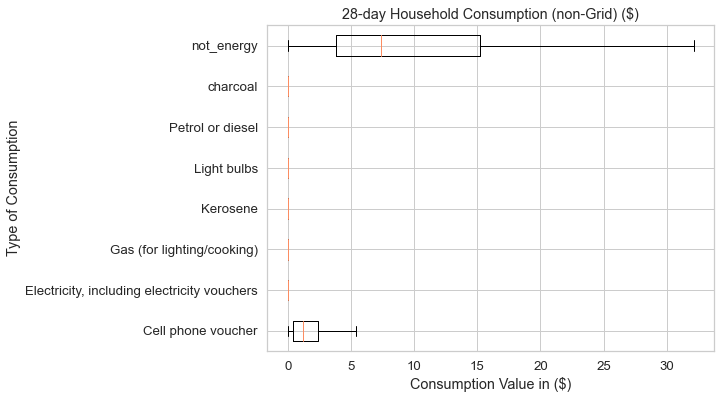

In [195]:
plt.figure(figsize=(8, 6))
plt.boxplot(monthly_spend_no_elec.iloc[:,:-1].values,
            labels = monthly_spend_no_elec.iloc[:,:-1].columns,
            vert=False,
            showfliers = False)
#plt.xticks(range(0, 2500, 200))
plt.title('28-day Household Consumption (non-Grid) ($)')
plt.xlabel('Consumption Value in ($)')
plt.ylabel('Type of Consumption')
plt.show()
#plt.savefig('hh_consumption.png', dpi = 300, format = 'png')

In [162]:
monthly_spend_no_elec_pct = pd.DataFrame(data = monthly_spend_no_elec.iloc[:,:-1].values / monthly_spend_no_elec.iloc[:,-1:].values,
             index = monthly_spend_no_elec.index,
             columns = monthly_spend_no_elec.iloc[:,:-1].columns)

In [163]:
monthly_spend_no_elec_pct

energy_item,Cell phone voucher,"Electricity, including electricity vouchers",Gas (for lighting/cooking),Kerosene,Light bulbs,Petrol or diesel,charcoal,not_energy
y5_hhid,,,,,,,,
1000-001-01,0.084746,0.0,0.0,0.000000,0.0,0.0,0.000000,0.915254
1000-001-02,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
1000-001-03,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
1001-001-01,0.597015,0.0,0.0,0.000000,0.0,0.0,0.000000,0.402985
1002-001-01,0.716418,0.0,0.0,0.000000,0.0,0.0,0.000000,0.283582
...,...,...,...,...,...,...,...,...
9798-001-99,0.218818,0.0,0.0,0.000000,0.0,0.0,0.087527,0.693654
9799-001-99,0.092593,0.0,0.0,0.009259,0.0,0.0,0.185185,0.712963
9805-001-99,0.077902,0.0,0.0,0.000000,0.0,0.0,0.155804,0.766294


In [181]:
def horizontal_bars(df,
                    title,
                    xlab,
                    ylab):
    """df is a pivot table that has expenditure types as columns. Expenditure types are %ages of the total expenditure for the household"""
    # Calculate the mean values
    mean_values = df.mean()
    sorted_columns = mean_values.sort_values(ascending=True).index
    sorted_df = df[sorted_columns]

    # Create horizontal bar plots for each column
    plt.figure(figsize=(8, 6))

    # Iterate over each column and create a horizontal bar plot
    for idx, column in enumerate(sorted_df.columns):
        mean_value = sorted_df[column].mean()
        plt.barh(idx, mean_value, color='skyblue', label=column)
        plt.text(mean_value, idx, f'{mean_value:.2%}', va='center', ha='left', color='black', fontweight='bold', fontsize=12)

    # Set y-axis ticks and labels
    plt.yticks(range(len(sorted_df.columns)), sorted_df.columns)
    plt.xlabel(xlab)
    plt.title(title)

    plt.show()

In [191]:
# Monthly non-food expenditure for non-grid households
monthly_spend_no_elec['total_expenditure'].mean()

18.90191785584933

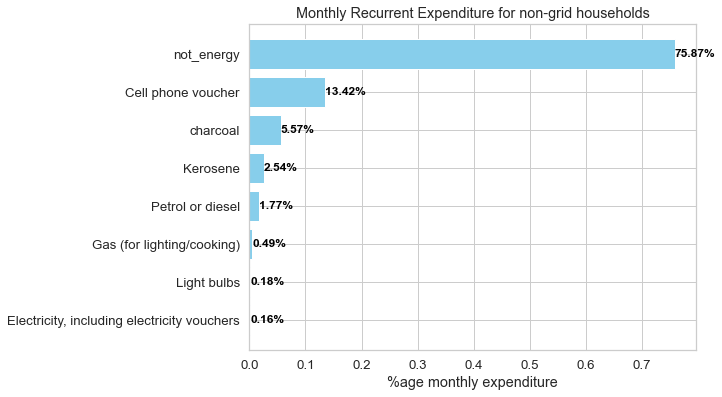

In [182]:
horizontal_bars(df = monthly_spend_no_elec_pct,
                title = 'Monthly Recurrent Expenditure for non-grid households',
                    xlab = '%age monthly expenditure',
                    ylab = 'expenditure')

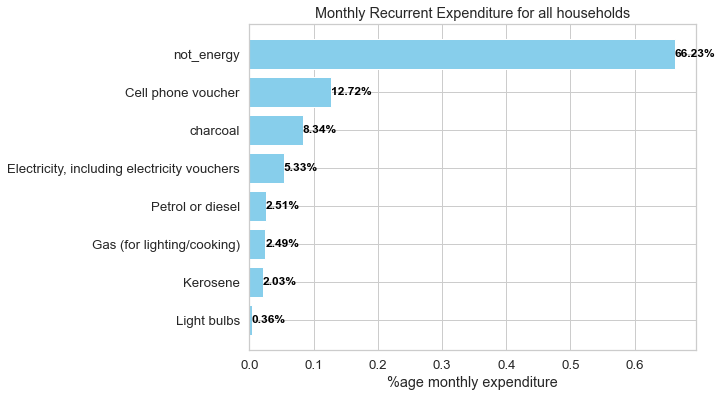

In [188]:
horizontal_bars(df = monthly_spend_pct,
                title = 'Monthly Recurrent Expenditure for all households',
                xlab = '%age monthly expenditure',
                ylab = 'expenditure')

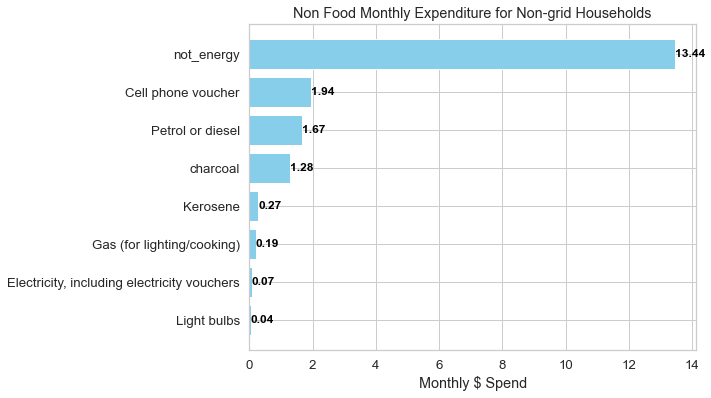

In [205]:
mean_values = monthly_spend_no_elec.iloc[:,:-1].mean()
sorted_columns = mean_values.sort_values(ascending=True).index
sorted_df = monthly_spend_no_elec[sorted_columns]

# Create horizontal bar plots for each column
plt.figure(figsize=(8, 6))

# Iterate over each column and create a horizontal bar plot
for idx, column in enumerate(sorted_df.columns):
    mean_value = sorted_df[column].mean()
    plt.barh(idx, mean_value, color='skyblue', label=column)
    plt.text(mean_value, idx, f'{mean_value:.2f}', va='center', ha='left', color='black', fontweight='bold', fontsize=12)

# Set y-axis ticks and labels
plt.yticks(range(len(sorted_df.columns)), sorted_df.columns)
plt.xlabel('Monthly $ Spend')
plt.title('Non Food Monthly Expenditure for Non-grid Households')

plt.show()

In [209]:
data_dict.keys()

dict_keys(['hh_sec_q1', 'hh_sec_q2', 'hh_sec_e3', 'hh_sec_e2', 'hh_sec_e1', 'hh_sec_i2', 'hh_sec_a', 'hh_sec_v', 'hh_sec_c', 'hh_sec_b', 'hh_sec_ja1', 'hh_sec_f', 'hh_sec_p', 'hh_sec_g', 'hh_sec_o2', 'hh_sec_r', 'hh_sec_s', 'hh_sec_d', 'hh_sec_o1', 'hh_sec_u2', 'hh_sec_i', 'hh_sec_h', 'hh_sec_k', 'consumption_real_y5', 'consumption_real_y4', 'hh_sec_n', 'hh_sec_l', 'hh_sec_m', 'hh_sec_j3', 'hh_sec_j1', 'hh_sec_j4'])

In [213]:
m_hh_assets = data_dict['hh_sec_m']
m_hh_assets.iloc[:,6:] = m_hh_assets.iloc[:,6:] * fx
m_hh_assets

,interview__key,y5_hhid,itemcode,hh_m00,hh_m01,hh_m02,hh_m03,hh_m04
0,39-26-37-98,1000-001-01,401,2.0,0.0,NaN,NaN,NaN
1,39-26-37-98,1000-001-01,402,2.0,0.0,NaN,NaN,NaN
2,39-26-37-98,1000-001-01,403,1.0,2.0,0.0,24.0,20.0
3,39-26-37-98,1000-001-01,404,2.0,0.0,NaN,NaN,NaN
4,39-26-37-98,1000-001-01,405,2.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
263699,53-69-11-30,9811-001-99,452,2.0,0.0,NaN,NaN,NaN
263700,53-69-11-30,9811-001-99,453,2.0,0.0,NaN,NaN,NaN
263701,53-69-11-30,9811-001-99,454,2.0,0.0,NaN,NaN,NaN
263702,53-69-11-30,9811-001-99,455,2.0,0.0,NaN,NaN,NaN
